In [1]:
import os
os.getcwd()
os.chdir('Downloads')

In [2]:
#Importing necessary  python libraries 

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import time
from scipy import stats
import seaborn as sn
import statsmodels.api as sm
from sklearn.metrics import precision_recall_fscore_support
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix
pd.set_option('display.max_columns',None)
import warnings
warnings.filterwarnings('ignore')
from matplotlib import style
from sklearn.ensemble import RandomForestClassifier


In [4]:
#Reading the dataset to python environment

In [5]:
df=pd.read_csv('dataset.csv')
df

,UID,Name,NationID,Born,Age,IntCaps,IntGoals,U21Caps,U21Goals,Height,Weight,AerialAbility,CommandOfArea,Communication,Eccentricity,Handling,Kicking,OneOnOnes,Reflexes,RushingOut,TendencyToPunch,Throwing,Corners,Crossing,Dribbling,Finishing,FirstTouch,Freekicks,Heading,LongShots,Longthrows,Marking,Passing,PenaltyTaking,Tackling,Technique,Aggression,Anticipation,Bravery,Composure,Concentration,Vision,Decisions,Determination,Flair,Leadership,OffTheBall,Positioning,Teamwork,Workrate,Acceleration,Agility,Balance,Jumping,LeftFoot,NaturalFitness,Pace,RightFoot,Stamina,Strength,Consistency,Dirtiness,ImportantMatches,InjuryProness,Versatility,Adaptability,Ambition,Loyalty,Pressure,Professional,Sportsmanship,Temperament,Controversy,PositionsDesc,Goalkeeper,Sweeper,Striker,AttackingMidCentral,AttackingMidLeft,AttackingMidRight,DefenderCentral,DefenderLeft,DefenderRight,DefensiveMidfielder,MidfielderCentral,MidfielderLeft,MidfielderRight,WingBackLeft,WingBackRight
0,1000055,Wilfred Bamnjo,11,27-03-1980,36,0,0.0,0.0,0,178.0,79,1,1,2.0,2,3,3,1,4,1,2,1,3,8,6,9,12,4,4,9,1,6,6,2,12,9,15.0,8,13,6,12,9,6,9,7,10,4,9,5,12,9,7,7,11,12,12,6,20,5,12,11,15,8,7,4,20,6,3,9,3,10,14,11,DM,1,1,1,1,1,1,1,1,1,20,11,1,1,1,1
1,1000331,Wang Wei,110,20-02-1982,34,0,0.0,0.0,0,188.0,90,12,3,5.0,1,12,6,2,1,6,6,5,3,1,2,3,1,6,1,1,1,3,1,3,2,1,6.0,1,12,3,3,2,12,5,2,8,1,8,3,2,5,13,5,9,11,5,8,20,1,7,6,6,6,6,6,14,10,7,11,11,12,10,6,GK,20,1,1,1,1,1,1,1,1,1,1,1,1,1,1
2,1000334,Liu Yang,110,11-04-1982,34,0,0.0,0.0,0,183.0,70,1,2,4.0,2,1,1,1,3,3,2,2,3,3,2,4,10,3,1,8,1,5,8,2,10,6,5.0,6,4,4,4,2,5,5,5,8,3,6,6,9,7,4,4,8,5,8,6,20,4,9,5,5,5,5,5,9,11,14,7,11,13,10,8,DM,1,1,1,1,1,1,1,1,1,20,1,1,1,1,1
3,1000337,Song Qi,110,07-04-1985,31,0,0.0,0.0,0,170.0,65,1,3,1.0,3,2,2,1,2,3,3,1,3,2,6,7,9,3,13,1,1,2,3,2,1,9,6.0,10,1,3,4,1,7,6,9,12,11,2,3,4,11,7,2,6,2,8,7,20,6,6,6,6,2,5,6,16,13,11,9,10,13,13,7,S,1,1,20,1,1,1,1,1,1,1,1,1,1,1,1
4,1000340,Chen Lei,110,20-01-1983,33,0,0.0,0.0,0,181.0,70,3,3,NaN,3,1,1,3,3,2,1,3,1,1,2,12,5,1,12,2,1,1,2,4,1,3,5.0,4,4,5,2,2,8,5,5,12,9,1,1,2,9,4,2,6,5,5,8,20,2,5,5,5,5,5,5,13,11,9,10,12,10,19,8,S,1,1,20,1,1,1,1,1,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
159536,981931,Scott Palguta,390,23-08-1982,33,0,0.0,0.0,0,NaN,87,1,1,1.0,1,1,1,1,1,1,1,1,3,2,6,6,9,3,14,4,10,12,10,10,12,9,NaN,13,13,11,9,11,12,8,5,11,9,11,10,12,9,7,8,14,20,14,11,8,13,13,12,5,8,5,8,11,2,15,8,11,11,10,7,D LC,1,1,1,1,1,1,17,20,10,1,1,1,1,13,1
159537,981959,Jamie Dodds,364,12-11-1981,34,0,0.0,0.0,0,183.0,75,1,1,1.0,1,1,1,1,1,1,1,1,12,9,8,13,11,13,9,10,4,6,9,14,8,11,NaN,7,10,12,9,9,9,3,12,12,9,11,9,11,6,11,12,12,9,15,8,20,7,8,12,8,1,3,11,19,12,11,10,10,12,19,3,AM RLC,1,1,1,20,15,15,1,1,1,1,12,1,1,1,1
159538,981962,Desmond Tachie,364,01-05-1984,32,0,0.0,0.0,0,178.0,75,1,1,1.0,1,1,1,1,1,1,1,1,7,10,7,12,8,6,12,7,4,3,6,6,1,12,NaN,11,5,7,7,5,8,8,11,10,14,7,6,9,12,8,2,9,20,10,8,11,13,7,8,8,6,8,8,11,13,11,12,11,12,13,3,S L,1,1,20,1,15,1,1,1,1,1,1,10,1,1,1
159539,981967,Joey Gjertsen,390,13-06-1982,34,0,0.0,0.0,0,176.0,71,1,1,1.0,1,1,1,1,1,1,1,1,9,12,10,11,8,8,11,6,7,9,11,7,9,10,NaN,8,13,9,9,9,7,12,14,10,10,8,13,14,11,10,9,7,8,14,11,20,12,8,14,8,10,9,13,13,9,11,11,14,15,14,2,M/AM R,1,1,14,10,13,16,1,1,1,4,10,13,20,1,1


In [6]:
#Getting basic details of the dataset

In [7]:
pd.set_option('display.max_rows',None)

In [8]:
df.head()

,UID,Name,NationID,Born,Age,IntCaps,IntGoals,U21Caps,U21Goals,Height,Weight,AerialAbility,CommandOfArea,Communication,Eccentricity,Handling,Kicking,OneOnOnes,Reflexes,RushingOut,TendencyToPunch,Throwing,Corners,Crossing,Dribbling,Finishing,FirstTouch,Freekicks,Heading,LongShots,Longthrows,Marking,Passing,PenaltyTaking,Tackling,Technique,Aggression,Anticipation,Bravery,Composure,Concentration,Vision,Decisions,Determination,Flair,Leadership,OffTheBall,Positioning,Teamwork,Workrate,Acceleration,Agility,Balance,Jumping,LeftFoot,NaturalFitness,Pace,RightFoot,Stamina,Strength,Consistency,Dirtiness,ImportantMatches,InjuryProness,Versatility,Adaptability,Ambition,Loyalty,Pressure,Professional,Sportsmanship,Temperament,Controversy,PositionsDesc,Goalkeeper,Sweeper,Striker,AttackingMidCentral,AttackingMidLeft,AttackingMidRight,DefenderCentral,DefenderLeft,DefenderRight,DefensiveMidfielder,MidfielderCentral,MidfielderLeft,MidfielderRight,WingBackLeft,WingBackRight
0,1000055,Wilfred Bamnjo,11,27-03-1980,36,0,0.0,0.0,0,178.0,79,1,1,2.0,2,3,3,1,4,1,2,1,3,8,6,9,12,4,4,9,1,6,6,2,12,9,15.0,8,13,6,12,9,6,9,7,10,4,9,5,12,9,7,7,11,12,12,6,20,5,12,11,15,8,7,4,20,6,3,9,3,10,14,11,DM,1,1,1,1,1,1,1,1,1,20,11,1,1,1,1
1,1000331,Wang Wei,110,20-02-1982,34,0,0.0,0.0,0,188.0,90,12,3,5.0,1,12,6,2,1,6,6,5,3,1,2,3,1,6,1,1,1,3,1,3,2,1,6.0,1,12,3,3,2,12,5,2,8,1,8,3,2,5,13,5,9,11,5,8,20,1,7,6,6,6,6,6,14,10,7,11,11,12,10,6,GK,20,1,1,1,1,1,1,1,1,1,1,1,1,1,1
2,1000334,Liu Yang,110,11-04-1982,34,0,0.0,0.0,0,183.0,70,1,2,4.0,2,1,1,1,3,3,2,2,3,3,2,4,10,3,1,8,1,5,8,2,10,6,5.0,6,4,4,4,2,5,5,5,8,3,6,6,9,7,4,4,8,5,8,6,20,4,9,5,5,5,5,5,9,11,14,7,11,13,10,8,DM,1,1,1,1,1,1,1,1,1,20,1,1,1,1,1
3,1000337,Song Qi,110,07-04-1985,31,0,0.0,0.0,0,170.0,65,1,3,1.0,3,2,2,1,2,3,3,1,3,2,6,7,9,3,13,1,1,2,3,2,1,9,6.0,10,1,3,4,1,7,6,9,12,11,2,3,4,11,7,2,6,2,8,7,20,6,6,6,6,2,5,6,16,13,11,9,10,13,13,7,S,1,1,20,1,1,1,1,1,1,1,1,1,1,1,1
4,1000340,Chen Lei,110,20-01-1983,33,0,0.0,0.0,0,181.0,70,3,3,NaN,3,1,1,3,3,2,1,3,1,1,2,12,5,1,12,2,1,1,2,4,1,3,5.0,4,4,5,2,2,8,5,5,12,9,1,1,2,9,4,2,6,5,5,8,20,2,5,5,5,5,5,5,13,11,9,10,12,10,19,8,S,1,1,20,1,1,1,1,1,1,1,1,1,1,1,1


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159541 entries, 0 to 159540
Data columns (total 89 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   UID                  159541 non-null  int64  
 1   Name                 159541 non-null  object 
 2   NationID             159541 non-null  int64  
 3   Born                 156270 non-null  object 
 4   Age                  159541 non-null  int64  
 5   IntCaps              159541 non-null  int64  
 6   IntGoals             159073 non-null  float64
 7   U21Caps              159480 non-null  float64
 8   U21Goals             159541 non-null  int64  
 9   Height               159084 non-null  float64
 10  Weight               159541 non-null  int64  
 11  AerialAbility        159541 non-null  int64  
 12  CommandOfArea        159541 non-null  int64  
 13  Communication        159316 non-null  float64
 14  Eccentricity         159541 non-null  int64  
 15  Handling         

In [10]:
df.describe()

,UID,NationID,Age,IntCaps,IntGoals,U21Caps,U21Goals,Height,Weight,AerialAbility,CommandOfArea,Communication,Eccentricity,Handling,Kicking,OneOnOnes,Reflexes,RushingOut,TendencyToPunch,Throwing,Corners,Crossing,Dribbling,Finishing,FirstTouch,Freekicks,Heading,LongShots,Longthrows,Marking,Passing,PenaltyTaking,Tackling,Technique,Aggression,Anticipation,Bravery,Composure,Concentration,Vision,Decisions,Determination,Flair,Leadership,OffTheBall,Positioning,Teamwork,Workrate,Acceleration,Agility,Balance,Jumping,LeftFoot,NaturalFitness,Pace,RightFoot,Stamina,Strength,Consistency,Dirtiness,ImportantMatches,InjuryProness,Versatility,Adaptability,Ambition,Loyalty,Pressure,Professional,Sportsmanship,Temperament,Controversy,Goalkeeper,Sweeper,Striker,AttackingMidCentral,AttackingMidLeft,AttackingMidRight,DefenderCentral,DefenderLeft,DefenderRight,DefensiveMidfielder,MidfielderCentral,MidfielderLeft,MidfielderRight,WingBackLeft,WingBackRight
count,1.595410e+05,1.595410e+05,159541.000000,159541.000000,159073.000000,159480.000000,159541.000000,159084.000000,159541.000000,159541.000000,159541.000000,159316.000000,159541.000000,159541.000000,159541.000000,159541.000000,159541.000000,159541.000000,159541.000000,159541.000000,159541.000000,159541.000000,159541.000000,159541.000000,159541.000000,159541.000000,159541.000000,159541.000000,159541.000000,159541.000000,159541.000000,159541.000000,159541.000000,159541.000000,158724.000000,159541.000000,159541.000000,159541.000000,159541.000000,159541.000000,159541.000000,159541.000000,159541.000000,159541.000000,159541.000000,159541.000000,159541.000000,159541.000000,159541.000000,159541.000000,159541.000000,159541.000000,159541.000000,159541.000000,159541.000000,159541.000000,159541.000000,159541.000000,159541.000000,159541.000000,159541.000000,159541.000000,159541.000000,159541.000000,159541.000000,159541.000000,159541.000000,159541.000000,159541.000000,159541.000000,159541.000000,159541.000000,159541.000000,159541.000000,159541.000000,159541.000000,159541.000000,159541.000000,159541.000000,159541.000000,159541.000000,159541.000000,159541.000000,159541.000000,159541.000000,159541.000000
mean,1.368157e+08,7.621294e+04,23.578033,0.988987,0.108466,0.507619,0.065883,180.022102,45.874922,2.991613,2.820924,2.765818,2.366219,3.032130,2.846033,2.771789,3.113570,2.764913,2.755950,2.677638,5.628735,6.198357,6.923418,6.250105,8.797212,5.751951,7.318451,6.101685,4.321341,6.793244,7.767978,4.877781,7.212585,8.371303,8.748771,8.476348,8.388201,7.807466,7.868191,7.415385,10.279734,7.683110,7.440533,8.093061,7.345209,7.983402,8.485186,9.379570,11.460803,10.836976,8.036248,8.779486,10.578973,11.169568,11.181345,17.349966,9.015150,8.518105,8.980469,7.698592,7.917833,7.432973,8.698009,12.610495,11.116772,11.134743,10.794617,11.197617,10.037269,13.121505,5.390978,3.043656,1.233094,5.438665,4.461580,4.020753,4.156649,5.233984,3.443848,3.665854,4.031534,5.729750,3.588626,3.726798,2.332165,2.345993
std,3.492948e+08,2.051496e+06,5.640172,6.642102,1.271062,2.535760,0.591362,7.220019,36.340693,2.901983,2.438456,2.295361,1.711801,2.973157,2.522910,2.363673,3.162772,2.273326,2.275373,2.150395,3.032922,3.709678,4.002881,3.779808,3.528975,3.191553,3.928802,3.422654,3.147688,3.660099,3.551159,3.606453,4.047660,3.599283,2.875981,2.940403,3.609050,3.019855,3.014545,3.294822,2.610788,4.031467,3.814159,3.719563,3.701678,3.265658,3.265975,3.132988,2.313743,2.330998,3.185810,3.461675,5.577138,2.787362,2.217254,5.202800,3.430156,3.063783,2.554136,2.607769,3.265432,2.457744,2.398335,4.098807,2.276208,2.196580,2.015020,2.280881,3.495683,4.126772,3.048874,5.882879,1.672098,7.546035,6.461307,6.075916,6.225964,7.552120,5.806511,6.027779,6.273162,7.436234,5.536178,5.673648,4.055871,4.056001
min,5.100000e+02,5.000000e+00,14.000000,0.000000,0.000000,0.000000,0.000000,149.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000

In [11]:
#Exploratory data analysis

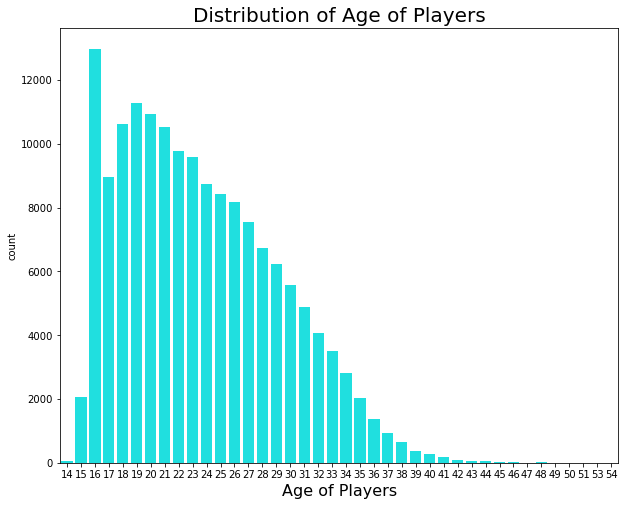

In [12]:
#Distribution of age of players
x=df['Age']
plt.figure(figsize=(10,8))
ax=sns.countplot(x,color='#00ffff')
ax.set_xlabel(xlabel='Age of Players',fontsize=16)
ax.set_title(label='Distribution of Age of Players',fontsize=20)
plt.show()

In [13]:
df['Age'].describe()

count    159541.000000
mean         23.578033
std           5.640172
min          14.000000
25%          19.000000
50%          23.000000
75%          27.000000
max          54.000000
Name: Age, dtype: float64

Around 75% of the players are below 27 years old.

<AxesSubplot:xlabel='Height', ylabel='Density'>

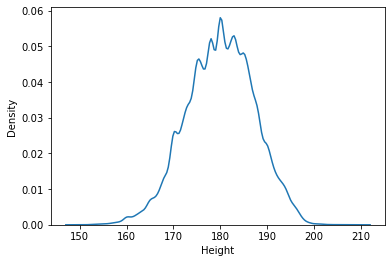

In [14]:
sns.kdeplot(df['Height'])

Most of the players have height between 175-185.

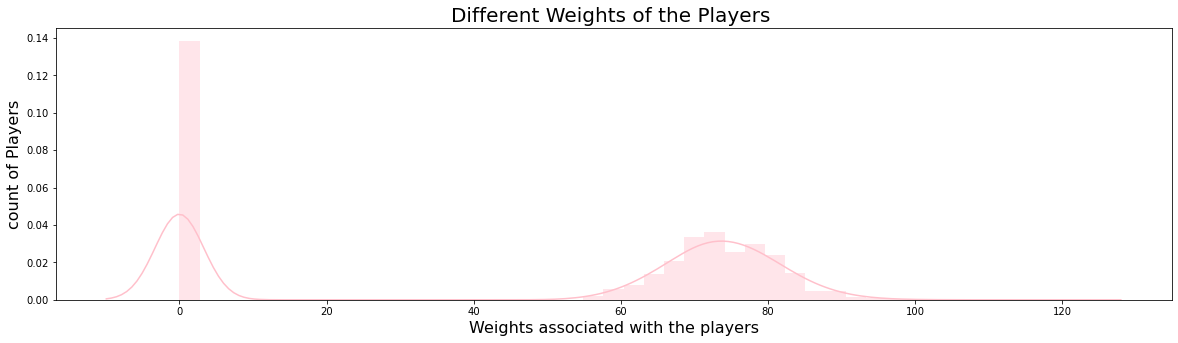

In [15]:
#weight of players
plt.figure(figsize = (20, 5))
plt.style.available
sns.distplot(df['Weight'], color = 'pink')
plt.title('Different Weights of the Players ', fontsize = 20)
plt.xlabel('Weights associated with the players', fontsize = 16)
plt.ylabel('count of Players', fontsize = 16)
plt.show()

There are some players with zero weights which is to be replaced.And almost other players have weights between 60-90.

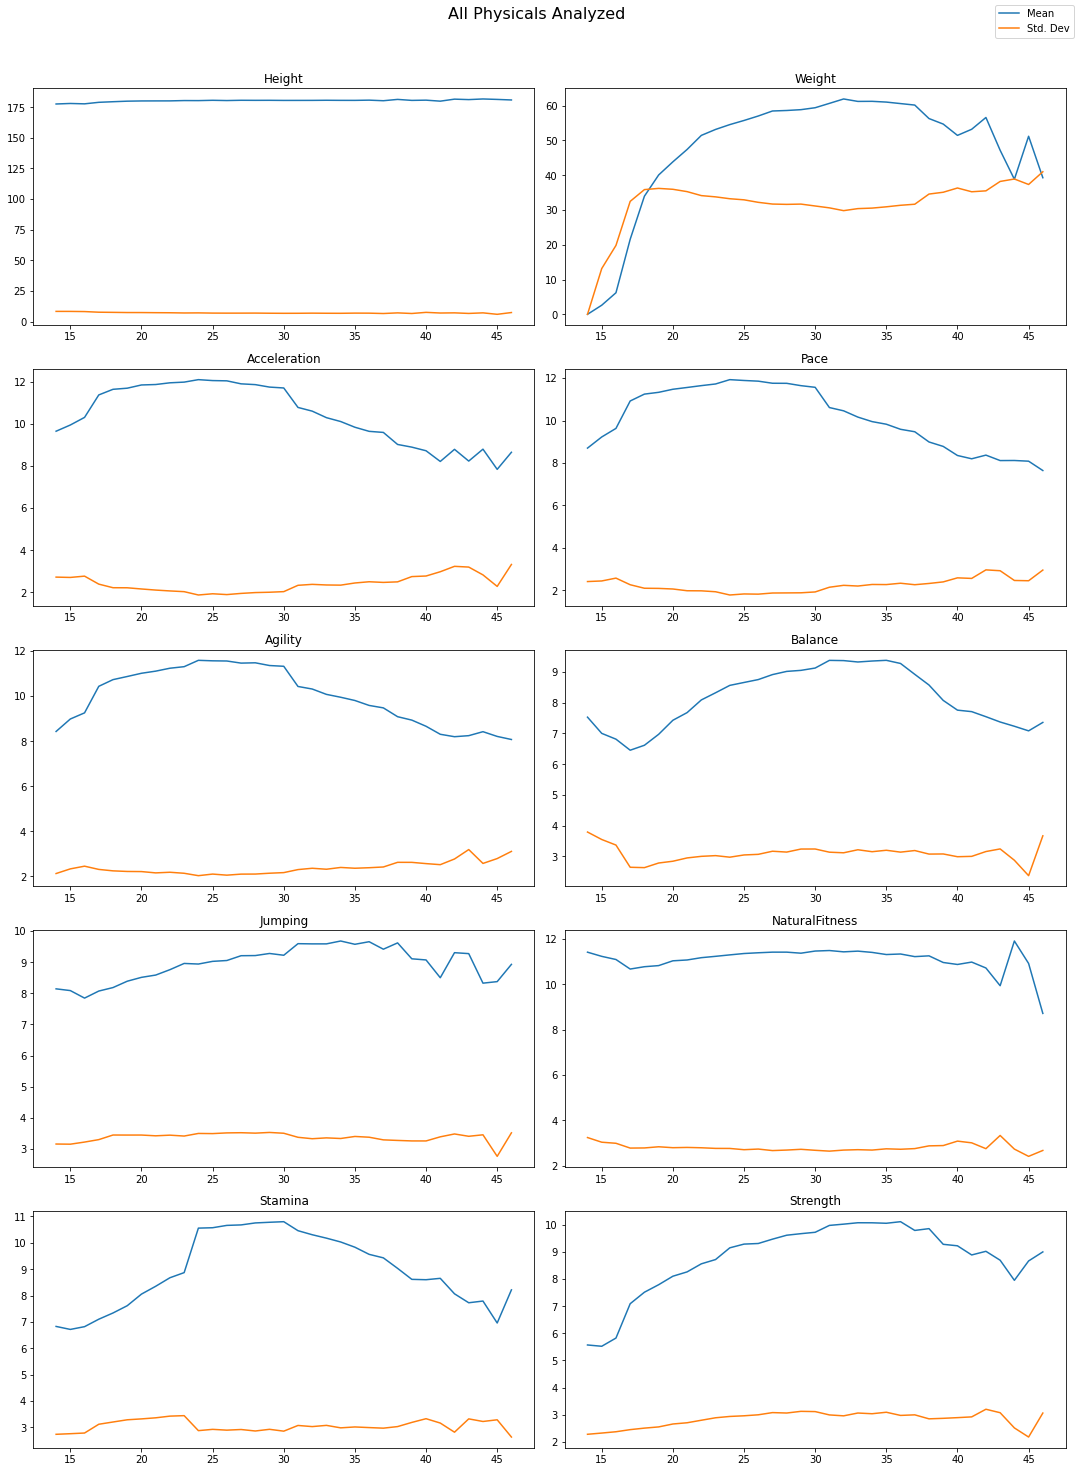

In [16]:
age = df.groupby(['Age'])
# Extracting just the physicals attributes
physicals = age[['Height', 'Weight', 'Acceleration', 'Pace', 'Agility', 
                 'Balance', 'Jumping', 'NaturalFitness', 'Stamina', 'Strength']]
physicals_subset = physicals.agg(['mean', 'std']).loc[14:46]
#Setting up the subplot
f, ((ax1, ax2), (ax3, ax4), (ax5, ax6), (ax7, ax8), (ax9, ax10)) = plt.subplots(5, 2, figsize=(15, 20))
ax1.plot(physicals_subset['Height'])
ax1.set_title('Height')
ax2.plot(physicals_subset['Weight'])
ax2.set_title('Weight')
ax3.plot(physicals_subset['Acceleration'])
ax3.set_title('Acceleration')
ax4.plot(physicals_subset['Pace'])
ax4.set_title('Pace')
ax5.plot(physicals_subset['Agility'])
ax5.set_title('Agility')
ax6.plot(physicals_subset['Balance'])
ax6.set_title('Balance')
ax7.plot(physicals_subset['Jumping'])
ax7.set_title('Jumping')
ax8.plot(physicals_subset['NaturalFitness'])
ax8.set_title('NaturalFitness')
ax9.plot(physicals_subset['Stamina'])
ax9.set_title('Stamina')
l1, l2 = ax10.plot(physicals_subset['Strength'])
ax10.set_title('Strength')
# Adding legend and title for the subplot
f.legend((l1, l2), ('Mean', 'Std. Dev'), 'upper right')
f.suptitle('All Physicals Analyzed', fontsize=16, y=1.02)

plt.tight_layout()


Text(0.5, 1.0, 'Distribution of Acceleration')

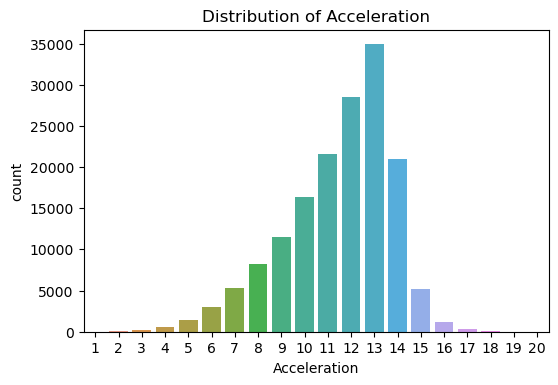

In [17]:
#distribution of acceleration throughout the dataset
plt.figure(figsize=(6,4),dpi=100)
ax=sns.countplot(x="Acceleration",data=df)
ax.set_title("Distribution of Acceleration")

Most of the players have acceleration between 11-14.

In [18]:
df[df['Acceleration'] == 20]['Name']

52177              Héctor Bellerín
52452                     Ola Aina
74688    Pierre-Emerick Aubameyang
99074                 David Radebe
Name: Name, dtype: object

There are only 4 players having acceleration 20.

<AxesSubplot:xlabel='Flair', ylabel='count'>

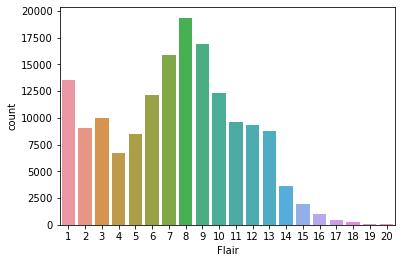

In [19]:
sns.countplot(x="Flair",data=df)

There are only a few players having high flair value.

In [20]:
df[df['Flair'] == 20]['Name']

126          Bader Al-Motawa
3371             Jan Vejvoda
4708              Mario Hyza
7557          Chun Kit Yeung
8111           Carlos Rincón
8329          Yury Kuznetsov
8835           Marko Borovec
8850             Pavel Tesar
10158        Pontus Lindberg
11497        Svetlozar Minev
11751         Martin Jirasek
12730         Siphiwe Maliwa
12869          Sung-Jin Park
12899         Young-Wook Son
13968             Dan Carter
51501     Gary Mackay-Steven
51761         Ravel Morrison
58333      Ronaldinho Gaúcho
66588      Andrea Gasbarroni
67806        Antonio Cassano
72572           Guy Mishpati
77162        Mattia Zaccagni
99131          Junior Khanye
105771        Martin Mutumba
112160         Tshepo Matete
112360        Vusimuzi Ncube
116000                Sergio
125266      Ricardo Quaresma
126266          Lionel Messi
Name: Name, dtype: object

<AxesSubplot:xlabel='Pace', ylabel='count'>

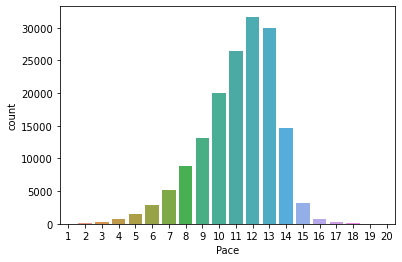

In [21]:
sns.countplot(x="Pace",data=df)

In [22]:
#Finding 15 eldest players from the dataset
df.sort_values('Age',ascending=False)[['Name', 'Age', 'NationID', 'PositionsDesc']].head(15).style.background_gradient('inferno')

,Name,Age,NationID,PositionsDesc
72085,Peter Hinds,54,361,S
135496,Robert Carmona,54,1657,M/AM C
21738,Marlon van der Sander,54,784,D C
125441,Lau Po Wah,54,111,D RL
129525,Iosif Rotariu,53,790,M/AM C
485,Graeme Lane,51,765,S
26170,Markus Hagen,51,755,GK
38892,Tony Hamilton-Bram,50,765,S
109818,Zvonko Jager,50,795,GK
90327,Juha Ansamaa,50,768,GK


In [23]:
#Finding 15 eldest players from the dataset
df.sort_values('Age',ascending=False)[['Name', 'Age', 'NationID', 'PositionsDesc']].head(15).style.background_gradient('inferno')

,Name,Age,NationID,PositionsDesc
72085,Peter Hinds,54,361,S
135496,Robert Carmona,54,1657,M/AM C
21738,Marlon van der Sander,54,784,D C
125441,Lau Po Wah,54,111,D RL
129525,Iosif Rotariu,53,790,M/AM C
485,Graeme Lane,51,765,S
26170,Markus Hagen,51,755,GK
38892,Tony Hamilton-Bram,50,765,S
109818,Zvonko Jager,50,795,GK
90327,Juha Ansamaa,50,768,GK


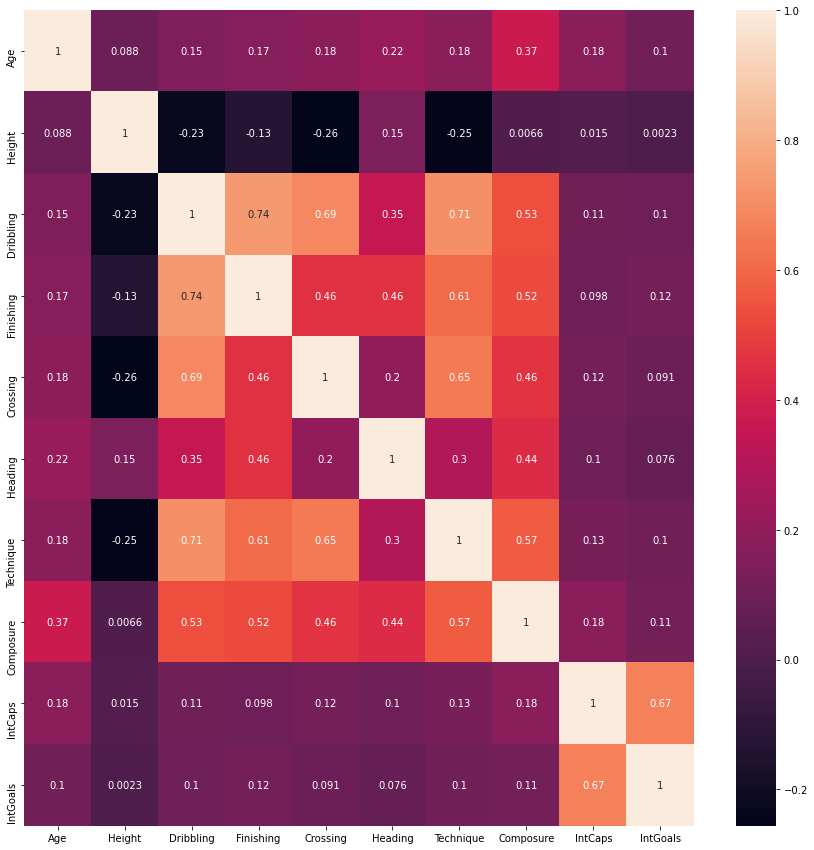

In [24]:
#Create correlation matrix for numeric variables
#Slice dataframe for specific columns in order to inspect correlations (seperate dfs for Attack, Mental)
#Attack
corr_df_attack = df.loc[:, ['Age', 'Height','Dribbling', 'Finishing','Crossing','Heading','Technique','Composure','IntCaps','IntGoals']]
#Mental
corr_df_mental = df.loc[:, ['Age', 'Height','Aggression', 'Anticipation','Bravery','Concentration','Ambition','Loyalty','Professional','Sportsmanship','Temperament','Controversy','Adaptability','Dirtiness','IntCaps','IntGoals']]
#Inspect corr matrix attack
corrMatrix_attack = corr_df_attack.corr()
fig, ax = plt.subplots(figsize=(15,15)) 
ax = sns.heatmap(corrMatrix_attack, annot=True)
plt.show()

Some correlations to be noted here are Age~Composure.All correlations for attackers main attributes are predictable.

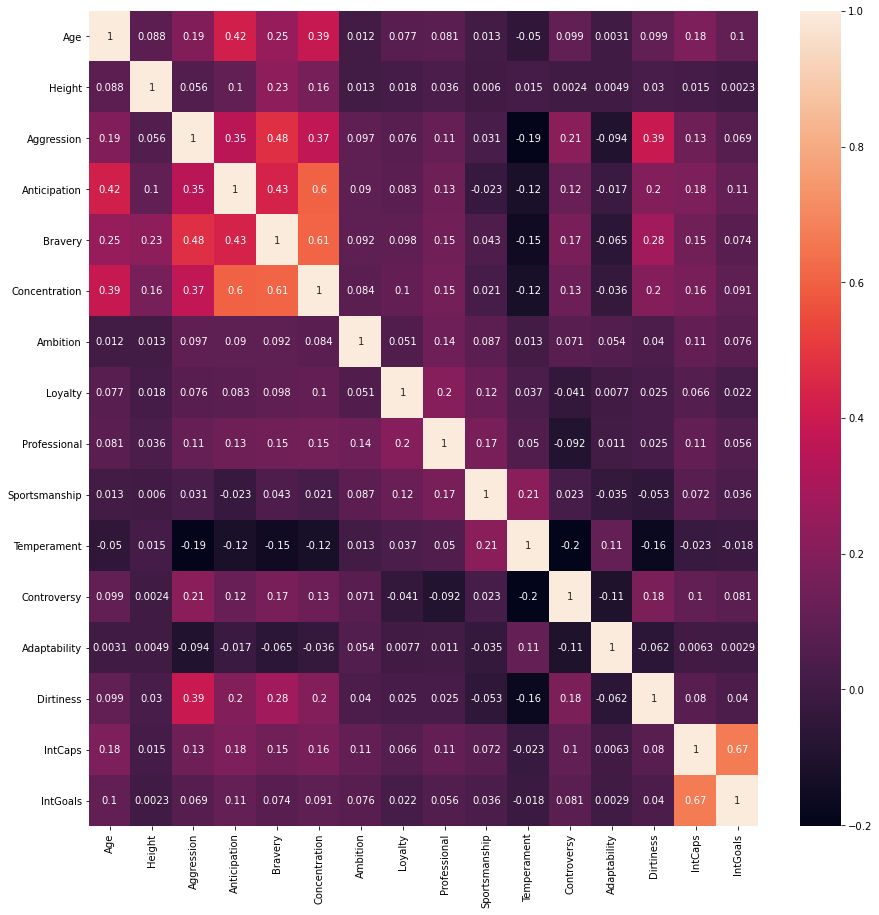

In [25]:
#Inspect corr matrix mental
corrMatrix_mental = corr_df_mental.corr()
fig, ax = plt.subplots(figsize=(15,15)) 
ax = sns.heatmap(corrMatrix_mental, annot=True)
plt.show()

 Age is medium correlated with Anticipation & Concentration but it may be  due to a player's experience. These are attrbute that increase with time.

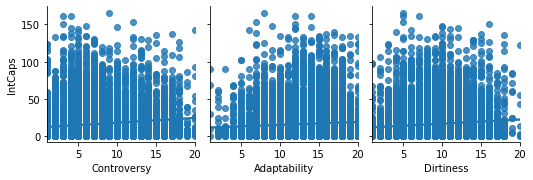

In [26]:
#Pair Scatterplots for IntCaps and Controversy-Adaptability-Dirtiness
g = sns.pairplot(data= df.query('IntCaps > 0'),y_vars=['IntCaps'],x_vars=['Controversy','Adaptability','Dirtiness'],kind="reg")

We get the plots to inspect the behaviour of the data points between Controversy, Adaptability, Dirtiness with International appearances.

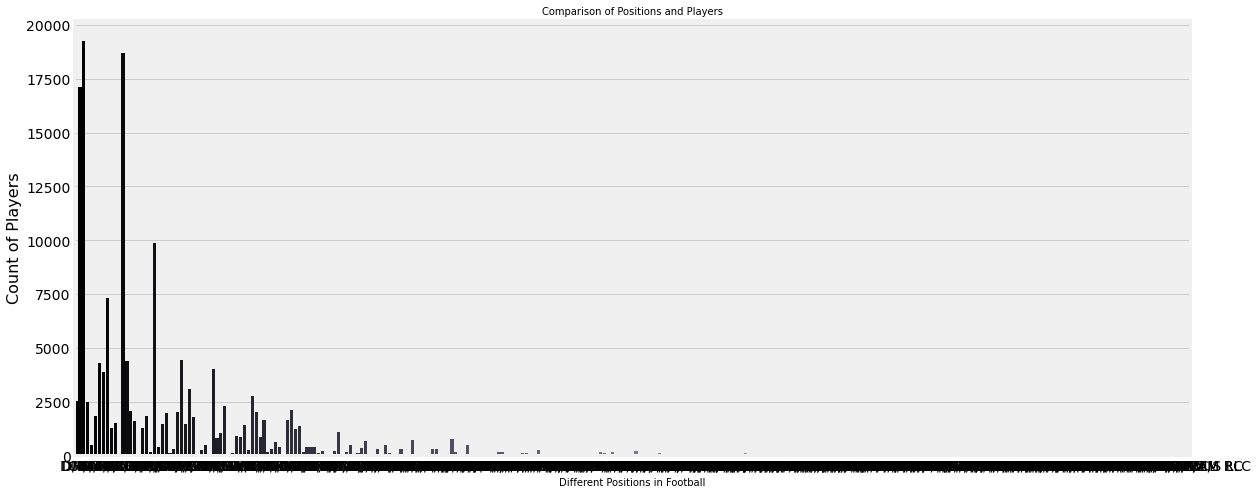

In [27]:
plt.figure(figsize = (20, 8))
plt.style.use('fivethirtyeight')
ax = sns.countplot('PositionsDesc', data = df, palette = 'bone')
ax.set_xlabel(xlabel = 'Different Positions in Football', fontsize = 10)
ax.set_ylabel(ylabel = 'Count of Players', fontsize = 16)
ax.set_title(label = 'Comparison of Positions and Players', fontsize = 10)
plt.show()

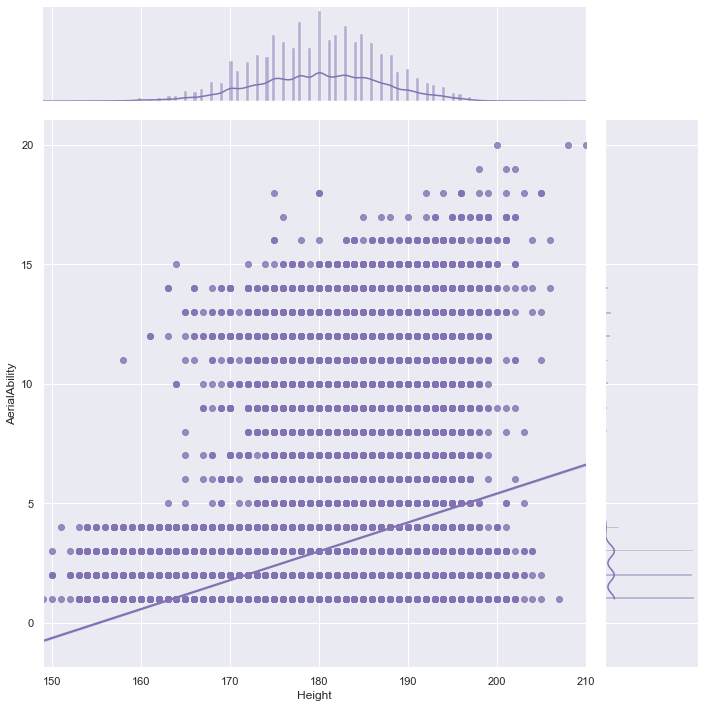

In [28]:
sns.set(style="darkgrid",color_codes=True)
sns.jointplot("Height","AerialAbility",data=df,kind="reg",color="m",height=10)

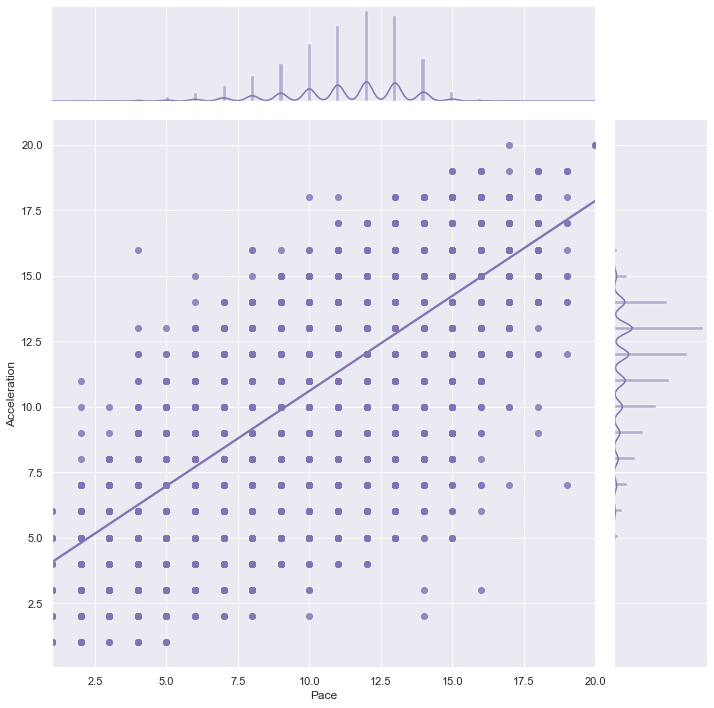

In [29]:
sns.set(style="darkgrid",color_codes=True)
sns.jointplot("Pace","Acceleration",data=df,kind="reg",color="m",height=10)

Acceleration and pace have a perfect linear relationship.

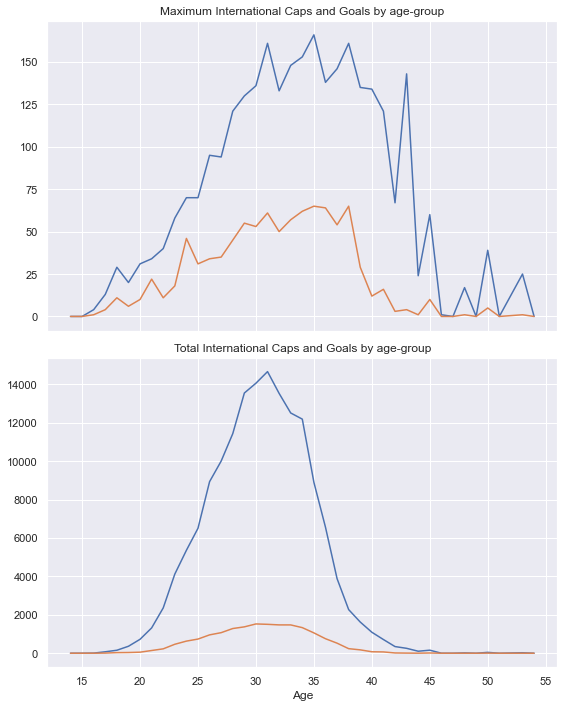

In [30]:
age = df.groupby(['Age'])
f, axarr = plt.subplots(2, sharex=True, figsize=(8,10))

international_max = age[['IntCaps', 'IntGoals']].max()
axarr[0].plot(international_max)
axarr[0].set_title('Maximum International Caps and Goals by age-group')

international_sum = age[['IntCaps', 'IntGoals']].sum()
axarr[1].plot(international_sum)
axarr[1].set_title('Total International Caps and Goals by age-group')
axarr[1].set_xlabel('Age')
plt.tight_layout()

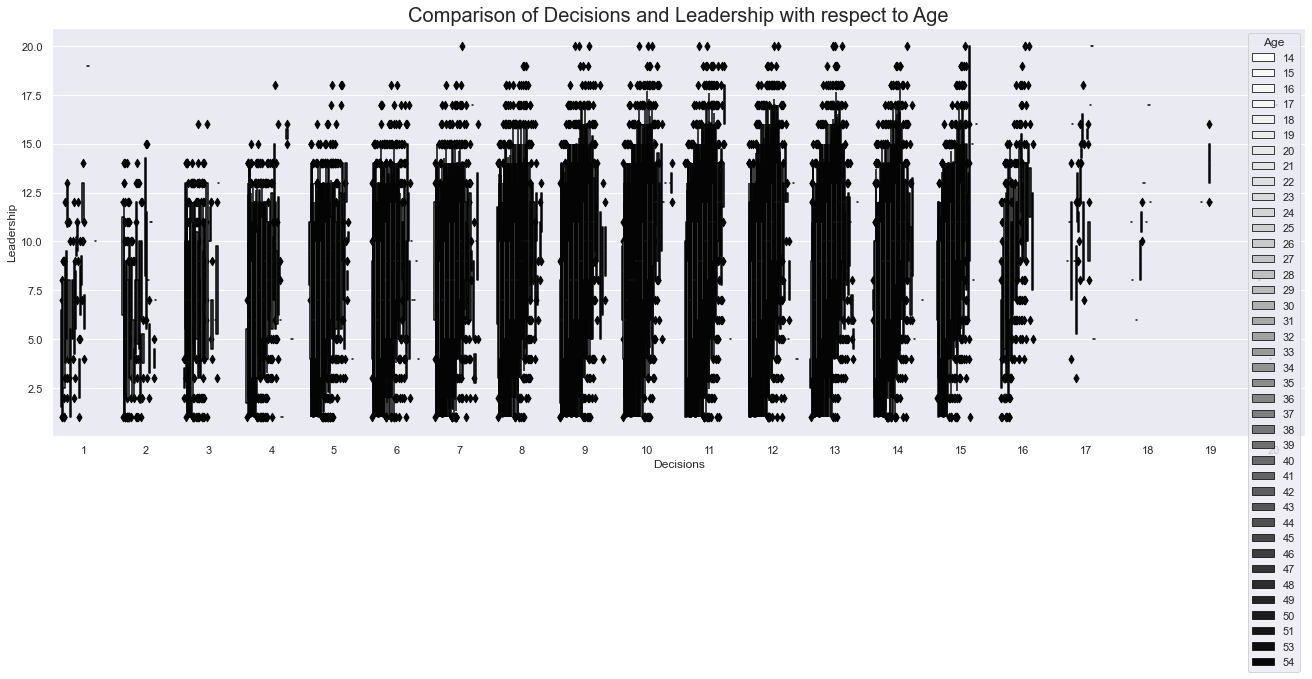

In [31]:
#violin plot
plt.rcParams['figure.figsize'] = (20, 7)
plt.style.use('seaborn-dark-palette')

sns.boxenplot(df['Decisions'], df['Leadership'], hue = df['Age'], palette = 'Greys')
plt.title('Comparison of Decisions and Leadership with respect to Age', fontsize = 20)
plt.show()

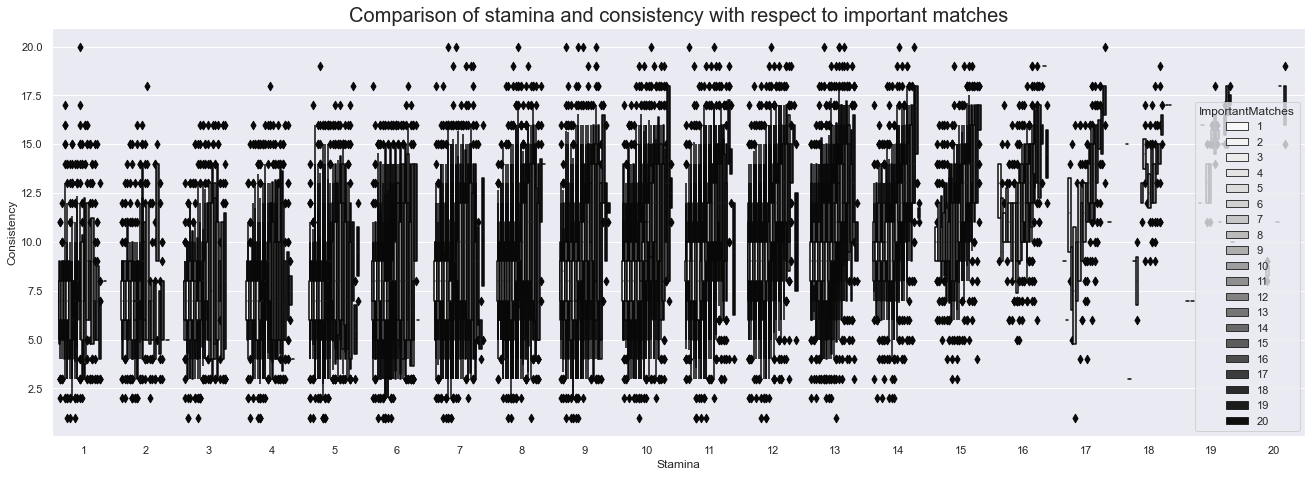

In [32]:
plt.rcParams['figure.figsize'] = (20, 7)
plt.style.use('seaborn-dark-palette')

sns.boxenplot(df['Stamina'], df['Consistency'], hue = df['ImportantMatches'], palette = 'Greys')
plt.title('Comparison of stamina and consistency with respect to important matches', fontsize = 20)
plt.show()

In [33]:
#Data preprocessing

In [34]:
df.isnull().sum()

UID                       0
Name                      0
NationID                  0
Born                   3271
Age                       0
IntCaps                   0
IntGoals                468
U21Caps                  61
U21Goals                  0
Height                  457
Weight                    0
AerialAbility             0
CommandOfArea             0
Communication           225
Eccentricity              0
Handling                  0
Kicking                   0
OneOnOnes                 0
Reflexes                  0
RushingOut                0
TendencyToPunch           0
Throwing                  0
Corners                   0
Crossing                  0
Dribbling                 0
Finishing                 0
FirstTouch                0
Freekicks                 0
Heading                   0
LongShots                 0
Longthrows                0
Marking                   0
Passing                   0
PenaltyTaking             0
Tackling                  0
Technique           

In [35]:
#Filling the null value columns

cols=['IntGoals','U21Caps','Height','Communication','Aggression','PositionsDesc']
for i in cols:
    df[i].fillna( method ='ffill', inplace = True)

df.drop(labels=['Born'],axis=1,inplace=True)

In [36]:
df.isnull().sum()

UID                    0
Name                   0
NationID               0
Age                    0
IntCaps                0
IntGoals               0
U21Caps                0
U21Goals               0
Height                 0
Weight                 0
AerialAbility          0
CommandOfArea          0
Communication          0
Eccentricity           0
Handling               0
Kicking                0
OneOnOnes              0
Reflexes               0
RushingOut             0
TendencyToPunch        0
Throwing               0
Corners                0
Crossing               0
Dribbling              0
Finishing              0
FirstTouch             0
Freekicks              0
Heading                0
LongShots              0
Longthrows             0
Marking                0
Passing                0
PenaltyTaking          0
Tackling               0
Technique              0
Aggression             0
Anticipation           0
Bravery                0
Composure              0
Concentration          0


In [37]:
df.columns

Index(['UID', 'Name', 'NationID', 'Age', 'IntCaps', 'IntGoals', 'U21Caps',
       'U21Goals', 'Height', 'Weight', 'AerialAbility', 'CommandOfArea',
       'Communication', 'Eccentricity', 'Handling', 'Kicking', 'OneOnOnes',
       'Reflexes', 'RushingOut', 'TendencyToPunch', 'Throwing', 'Corners',
       'Crossing', 'Dribbling', 'Finishing', 'FirstTouch', 'Freekicks',
       'Heading', 'LongShots', 'Longthrows', 'Marking', 'Passing',
       'PenaltyTaking', 'Tackling', 'Technique', 'Aggression', 'Anticipation',
       'Bravery', 'Composure', 'Concentration', 'Vision', 'Decisions',
       'Determination', 'Flair', 'Leadership', 'OffTheBall', 'Positioning',
       'Teamwork', 'Workrate', 'Acceleration', 'Agility', 'Balance', 'Jumping',
       'LeftFoot', 'NaturalFitness', 'Pace', 'RightFoot', 'Stamina',
       'Strength', 'Consistency', 'Dirtiness', 'ImportantMatches',
       'InjuryProness', 'Versatility', 'Adaptability', 'Ambition', 'Loyalty',
       'Pressure', 'Professional', 'Sports

In [38]:
players_features=df.loc[:,['AerialAbility','CommandOfArea','Communication','Eccentricity','Handling','Kicking','OneOnOnes','Reflexes','RushingOut','TendencyToPunch','Throwing','Corners','Crossing','Dribbling','Finishing','FirstTouch','Freekicks','Heading','LongShots','Longthrows','Marking','Passing','PenaltyTaking','Tackling','Technique','Aggression','Anticipation','Bravery','Composure','Concentration','Vision','Decisions','Determination','Flair','Leadership','OffTheBall','Positioning','Teamwork','Workrate','Acceleration','Agility','Balance','Jumping']]


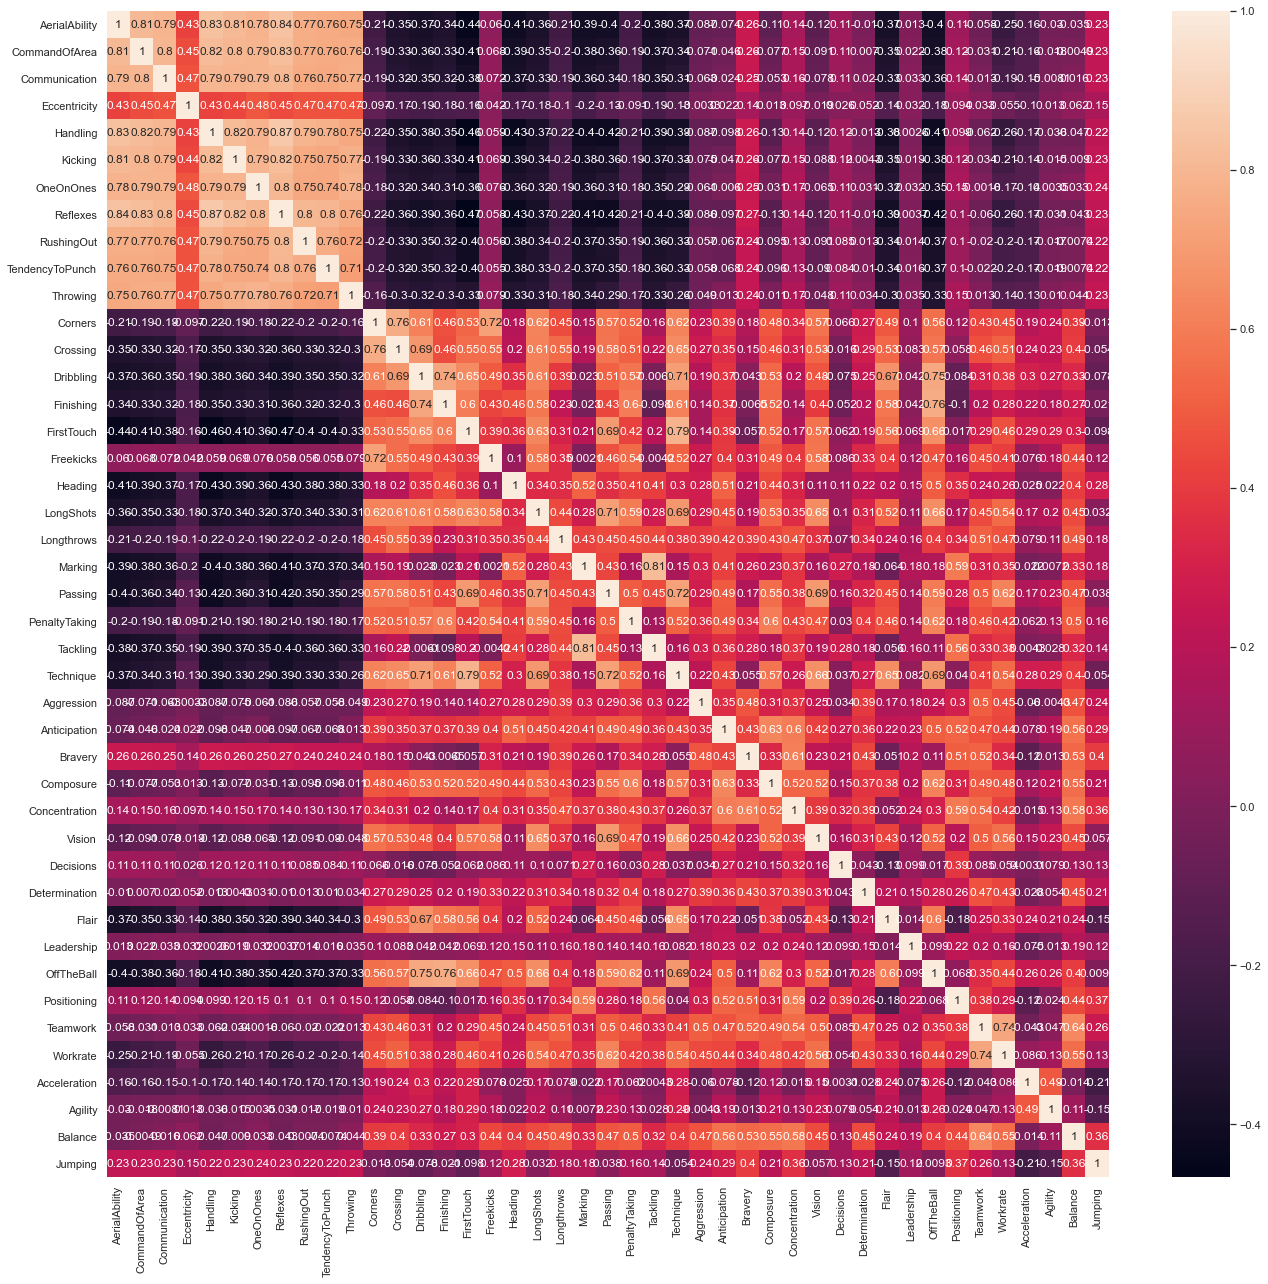

In [39]:
corrMatrix_playersfeature = players_features.corr()
fig, ax = plt.subplots(figsize=(20,20)) 
ax = sns.heatmap(corrMatrix_playersfeature, annot=True)
plt.show()

We can see that the first 11 skills are highly correlated with each others. These are goalkeeper skills. Therefore, players who have high points in these skills tend to be a goalkeeper. Moreover, there are some interesting skills such as, flair,off the ball and dribbling. Players with good dribbling also have a good flair. However, they tend to have low score in defending skills like tackling or marking. Therefore, there is a pattern in skillset of each position and clustering method from machine learning may apply to this problem.

Before we go to the clustering part, to make sure that the data has a pattern that can cluster in to a position group, we plot the data between two difference skills: dribbling and marking. Since dribbling tends to be the skill of attacking position while marking is for defending position. Using 2-dimension scatterplot might show the pattern of grouping.

In [51]:
#create dummy variables to positionsdesc
df=pd.get_dummies(df,columns=['PositionsDesc'],drop_first=True)

In [52]:
#Create categorical variable for IntCaps
international = df.loc[df['IntCaps'] > 0]
#Inspect IntCaps distribution only for those who hade made a single or more appearances
international['IntCaps'].describe()

count    9636.000000
mean       16.374429
std        21.876032
min         1.000000
25%         2.000000
50%         7.000000
75%        21.000000
max       166.000000
Name: IntCaps, dtype: float64

In [53]:
def caps_categorical(row):
   if  (row['IntCaps'] <= 7):
       return 0
   else:
       return 1
   
international['IntCaps_categorical'] = international.apply(lambda row: caps_categorical(row),axis=1)
international['IntCaps_categorical'].value_counts()

0    4873
1    4763
Name: IntCaps_categorical, dtype: int64

We create a new binary categorical variable which classifies the number of International Appearances based on the median value. We do this in order to implement classification algorithms trying to predict a player's number of international caps based on some of his attributes

In [54]:
# Perform Feature Selection from a pool of variables
X = international.iloc[:, 22:73]
y = international['IntCaps_categorical']

cols = list(X.columns)
pmax = 1
while (len(cols)>0):
    p= []
    X_1 = X[cols]
    X_1 = sm.add_constant(X_1)
    model = sm.OLS(y,X_1).fit()
    p = pd.Series(model.pvalues.values[1:],index = cols)      
    pmax = max(p)
    feature_with_p_max = p.idxmax()
    if(pmax>0.05):
        cols.remove(feature_with_p_max)
    else:
        break
selected_features_BE = cols
print(selected_features_BE)

['Heading', 'Anticipation', 'Bravery', 'Composure', 'Decisions', 'Flair', 'Leadership', 'OffTheBall', 'Teamwork', 'Jumping', 'LeftFoot', 'NaturalFitness', 'RightFoot', 'Stamina', 'ImportantMatches', 'InjuryProness', 'Versatility', 'Adaptability', 'Ambition', 'Loyalty', 'Pressure', 'Sportsmanship', 'Controversy']


In [56]:
# Create Logistic Regression Model 

# Slice Dataset
x = international[['ImportantMatches', 'Adaptability', 'Ambition', 'Loyalty', 'Pressure', 'Sportsmanship', 'Temperament', 'Controversy']]
y = international[['IntCaps_categorical']]
y['IntCaps_categorical'].value_counts()

# Splitting the dataset into the Training set and Test set
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 0)

#Inspect y_test counts
y_test['IntCaps_categorical'].value_counts()

# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

# Fitting Logistic Regression to the Training set
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state=0)
classifier.fit(x_train, y_train)

# Predicting the Test set results
y_pred = classifier.predict(x_test)

# Making the Confusion Matrix
cm = confusion_matrix(y_test, y_pred)

print(cm)

#Extract metrics precision, recall, fscore, support
precision_recall_fscore_support(y_test, y_pred, average='macro')



[[743 469]
 [493 704]]


(0.6006515945339723, 0.6005866564100019, 0.6005594853975346, None)

There's an accuracy of almost 60%. Errors are normally distributed and they do not occur for a specific category. Players with more than 7 international appearances are 1197. The prediction is better than a naive model but of course the model's accuracy is still too low.


In [57]:
# Fitting Random Forest Classification to the Training set
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', max_depth = 3, random_state = 0)
classifier.fit(x_train, y_train)

# Predicting the Test set results
y_pred = classifier.predict(x_test)

# Making the Confusion Matrix
cm = confusion_matrix(y_test, y_pred)

print(cm)

#Extract metrics
precision_recall_fscore_support(y_test, y_pred, average='macro')
#precision, recall, fscore, support


[[811 401]
 [548 649]]


(0.6074287816671923, 0.6056653597690596, 0.60427101297776, None)

The model's accuracy ranges at 60%. Errors still normally distributed. The prediction is again better than a naive model.

Overall, the tested models give approximately the same results. This was an approach to predict a player's international appearances. Of course, don't forget that players are increasing their attributes as they play for the international teams